## Explicación

En este programa se calcula la exactitud de los resultados obtenidos con la simulación, es decir que tan alejados están en promedio de los valores teóricos. Para ello se otendrá el promedio de la desviación de cada S(E,M) experimental respecto al S(E,M). La medida de la desviación estándar será la manera de concluir el grado de exactitud.

# Paquetería necesaria

In [3]:
using PyPlot
using Interact
using LaTeXStrings

# Variables requeridas

In [56]:
function Iniciar_arreglo_de_datos()
    global serie = []
end

Iniciar_arreglo_de_datos (generic function with 1 method)

In [78]:
function Datos_experimetales(longitud,etiqueta)
    global L=longitud
    global caracterizacion = "WL2D_red-cuadrada_L-$(L)_Ising-ferro_cam-10_f-0.0001_sim-$(etiqueta)";
#    println(caracterizacion)
    global datos_exp
    global cabecera
    datos_exp, cabecera = readdlm("Entropia_2D_final/Entropia_2D_final_$(caracterizacion).txt", header=true);
    global l = size(datos_exp)[1]
    push!(serie,datos_exp)
end

Datos_experimetales (generic function with 1 method)

In [30]:
function Accesar_datos(tamaño,etiquetas)
    for i in etiquetas
        Datos_experimetales(tamaño,i)
    end
    length(serie)
end  

Accesar_datos (generic function with 1 method)

In [31]:
function Agregar_datos_experimentales(tamaño, índice)
    Datos_experimetales(tamaño, índice)
end 

Agregar_datos_experimentales (generic function with 1 method)

In [74]:
function Agregar_datos_teóricos(longitud)
    global datos_teo = readdlm("Ising_CnxCn/ising_c$(L)xc$(L).txt")
    # Poner en la primera columna energía; en la segunda magnetización; en la tercera entropía
    datos_teo = hcat(datos_teo[:,2],datos_teo[:,3],log(datos_teo[:,1]))
    datos_teo = datos_teo[1:end-1,:]
    # En caso de que se trate de interacción ferromagnética, se multiplica por -1.
    datos_teo[:,1] = datos_teo[:,1]*(-1);
    # Ordenar por energía y luego por magnetización
    datos_teo = sortrows(datos_teo, by=x->(x[1],x[2]));
end

Agregar_datos_teóricos (generic function with 1 method)

# Datos de entropía exacta, si la hay

Los archivos de la entropía exacta tienen la siguiente configuración

***1a Columna***: Valor de la entropía

***2a Columna***: Energía

***3a Columna***: Magnetización

### En caso de estudiar modelo de Ising Antiferromagnético:

In [ ]:
# En caso de que se trate de interacción antiferromagnética, se multiplica por -1.
datos_teo[:,2] = datos_teo[:,2]*(-1);

In [ ]:
#reordenar por energía(segunda columna) y luego por magnetización (3a columna).
datos_teo = sortrows(datos_teo, by=x->(x[2],x[3]));
#datos_teo = [datos_teo[:,2] datos_teo[:,3] datos_teo[:,1]]

# Definiendo funciones

## Gráficas de entropía experimental y teórica con animación

In [120]:
function Grafica3d(datos...;azimut=60, elevacion=30, rango_x="auto",rango_y="auto")
#    fig = figure()
#    @manipulate for angle_azim=0:10:360,angle_elev=0:10:90
#        withfig(fig) do
            
            for i in 1:length(datos)
                plot3D(datos[i][:,1],datos[i][:,2],datos[i][:,3], ".", alpha=0.2 )
                ax = gca()
                ax[:view_init](elev=elevacion, azim=azimut)
            end
            if rango_x !="auto"
                xlim(rango_x)
            end
            if rango_y !="auto"
                ylim(rango_y)
            end
    legend()
            xlabel(L"E")
            ylabel(L"M")
            zlabel(L"S")
            title("Entropía simulada")
#        end
#    end             
end

Grafica3d (generic function with 2 methods)

In [103]:
function Animar_grafica3d(datos...)
    fig = figure(figsize=(8,6))
    @manipulate for angle_azim=0:10:360,angle_elev=0:10:90
        withfig(fig) do
            Grafica3d(datos...,azimut=angle_azim,elevacion=angle_elev)
        end
    end
end 

Animar_grafica3d (generic function with 2 methods)

In [35]:
function Grafica3d_teórica(angle,x,y,z)
    plot3D(x, y, log(z), "o", alpha=0.2 )
    ax = gca()
    ax[:view_init](elev=30., azim=angle)
end

Grafica3d_teórica (generic function with 1 method)

In [36]:
function Animar_grafica3d_teórica(x,y,z)
    fig = figure(figsize=(8,6))
    @manipulate for angle=0:10:360
        withfig(fig) do
            Grafica3d_teórica(angle,x,y,z)
        end
    end
end 

Animar_grafica3d_teórica (generic function with 1 method)

### Comparar restando, entropía teórica y entropía experimental

In [119]:
function Compara_entropias(val_teo,val_exp;azimut=60, elevacion=30)
            plot3D(val_teo[:,1], val_teo[:,2], val_exp[:,3]-val_teo[:,3], ".", alpha=0.2 )
            ax = gca()
            ax[:view_init](elev=elevacion, azim=azimut)
    xlabel(L"E")
            ylabel(L"M")
            zlabel(L"S")
    title("Resta de entropía teórica y simulada")
end

Compara_entropias (generic function with 1 method)

In [113]:
function Animar_comparacion_de_entropias(datos_teo,datos_exp)
    fig = figure(figsize=(8,6))
    @manipulate for angle_azim=0:10:360,angle_elev=0:10:90
        withfig(fig) do
            Compara_entropias(datos_teo,datos_exp,azimut=angle_azim,elevacion=angle_elev)
        end
    end
end 

Animar_comparacion_de_entropias (generic function with 1 method)

# Análisis para la entropía simulada

In [38]:
function Desviación_promedio(val_teo, val_exp)
    χ_cuadrada = 0
    diferencia_promedio = 0
    entropia_exacta_min = minimum(val_teo[:,3])
    entropia_simulada_min = minimum(val_exp[:,3])
    diferencia = abs(val_teo[:,3]-val_exp[:,3])
    exactitud = abs((val_exp[:,3]-entropia_simulada_min)-(val_teo[:,3]-entropia_exacta_min))
    for i in 1:l
        χ_cuadrada += (val_teo[i,3]-val_exp[i,3])*(val_teo[i,3]-val_exp[i,3])
    end
    χ_cuadrada = χ_cuadrada./l
    diferencia_promedio = mean(diferencia)
    σ = std(diferencia)
    exactitud_promedio = mean(exactitud)
    return χ_cuadrada, diferencia_promedio, σ, exactitud_promedio
end

Desviación_promedio (generic function with 1 method)

In [80]:
function Entropia_promedio(datos)
    número_de_repeticiones = length(datos)
    entropia_promedio = zeros(l,6)
    entropia_promedio[:,1] = datos[1][:,1]
    entropia_promedio[:,2] = datos[1][:,2]
    for i in 1:l
        entropia_promedio[i,3] = mean([datos[j][i,3] for j in 1:número_de_repeticiones])
        entropia_promedio[i,4] = stdm([datos[j][i,3] for j in 1:número_de_repeticiones],entropia_promedio[i,3])
        entropia_promedio[i,5] = mean([datos[j][i,4] for j in 1:número_de_repeticiones])
        entropia_promedio[i,6] = stdm([datos[j][i,4] for j in 1:número_de_repeticiones],entropia_promedio[i,5])
    end
    return entropia_promedio
end

Entropia_promedio (generic function with 1 method)

# Aquí acaban las funciones

In [76]:
Iniciar_arreglo_de_datos()

0-element Array{Any,1}

In [79]:
Accesar_datos(16,1:20);

WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-1
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-2
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-3
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-4
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-5
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-6
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-7
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-8
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-9
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-10
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-11
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-12
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-13
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-14
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-15
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-16
WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001_sim-17
WL2D_red-cuadrada_L-16_

In [82]:
entropía_final=Entropia_promedio(serie)


29430x6 Array{Float64,2}:
 -512.0  -256.0   1.43193  0.601024  256.0  0.0
 -512.0   256.0   1.4669   0.876001  256.0  0.0
 -504.0  -254.0   7.28566  0.769276  254.0  0.0
 -504.0   254.0   7.16902  0.78171   254.0  0.0
 -500.0  -252.0   8.03274  0.755704  252.0  0.0
 -500.0   252.0   7.88198  0.801701  252.0  0.0
 -496.0  -252.0  12.2131   0.759655  252.0  0.0
 -496.0  -250.0   9.16911  0.83592   250.0  0.0
 -496.0  -248.0   7.29808  0.919937  248.0  0.0
 -496.0   248.0   7.01898  0.873227  248.0  0.0
 -496.0   250.0   8.99318  0.786499  250.0  0.0
 -496.0   252.0  12.041    0.765735  252.0  0.0
 -492.0  -250.0  13.6379   0.757623  250.0  0.0
    ⋮                                       ⋮  
  492.0     0.0  10.6322   0.924836    0.0  0.0
  492.0     2.0  13.3805   0.961938    2.0  0.0
  492.0     4.0   8.45008  0.907141    4.0  0.0
  496.0    -4.0  11.2052   0.852537    4.0  0.0
  496.0    -2.0   8.93225  0.949722    2.0  0.0
  496.0     0.0  11.987    0.919894    0.0  0.0
  496.0     2.

In [127]:
writedlm( "Entropia_promedio_WL2D_red-cuadrada_L-$(L)_Ising-ferro_cam-10_f-0.0001.txt",entropía_final)

In [83]:
Agregar_datos_teóricos(16)

29430x3 Array{Float64,2}:
 -512.0  -256.0   0.0     
 -512.0   256.0   0.0     
 -504.0  -254.0   5.54518 
 -504.0   254.0   5.54518 
 -500.0  -252.0   6.23832 
 -500.0   252.0   6.23832 
 -496.0  -252.0  10.3775  
 -496.0  -250.0   7.33694 
 -496.0  -248.0   5.54518 
 -496.0   248.0   5.54518 
 -496.0   250.0   7.33694 
 -496.0   252.0  10.3775  
 -492.0  -250.0  11.7518  
    ⋮                     
  492.0     0.0   9.01091 
  492.0     2.0  11.7678  
  492.0     4.0   6.93147 
  496.0    -4.0   9.69622 
  496.0    -2.0   7.33694 
  496.0     0.0  10.3815  
  496.0     2.0   7.33694 
  496.0     4.0   9.69622 
  500.0     0.0   6.93147 
  504.0    -2.0   5.54518 
  504.0     2.0   5.54518 
  512.0     0.0   0.693147

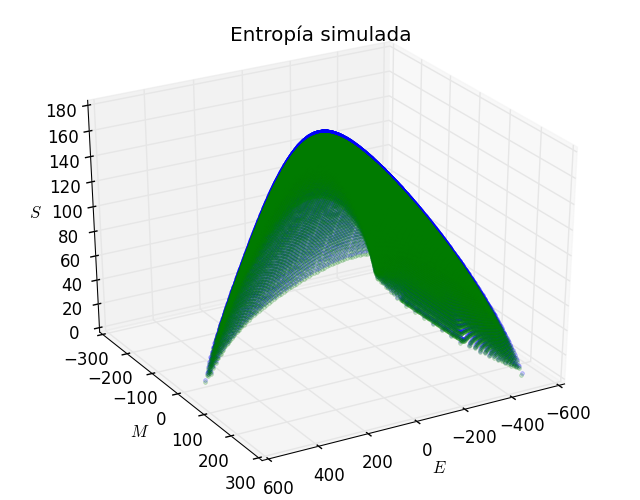

In [121]:
Grafica3d(entropía_final, datos_teo)
savefig("comparacion.pdf")

In [92]:
Desviación_promedio(datos_teo, entropía_final)

(5.604666896628825,2.3489272279852242,0.2953146416727318,0.9175795162411077)

Interact.Slider{Int64}(Signal{Int64}(180, nactions=0),"angle_azim",180,0:10:360,true)

Interact.Slider{Int64}(Signal{Int64}(40, nactions=0),"angle_elev",40,0:10:90,true)

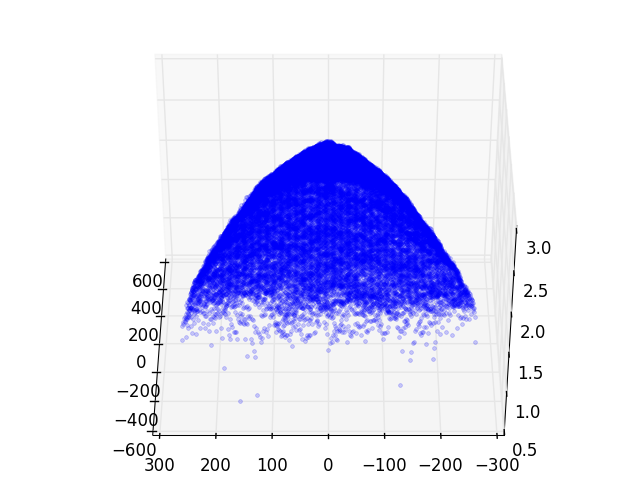

In [114]:
Animar_comparacion_de_entropias(datos_teo,entropía_final)

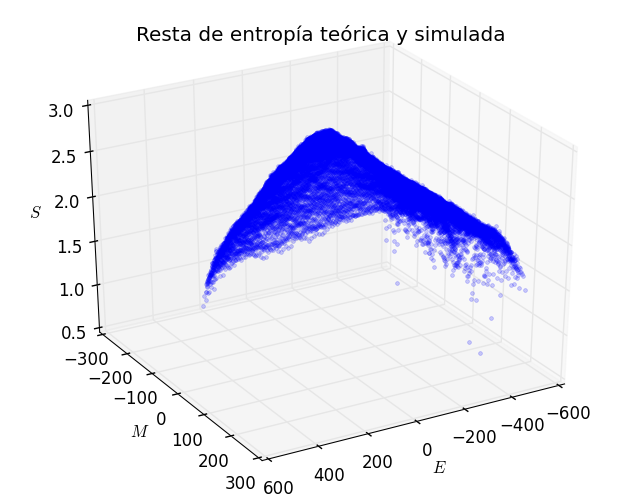

In [123]:
Compara_entropias(datos_teo,entropía_final)
savefig("entropia_exacta_vs_entropia_sim_L_16.pdf")

In [131]:
?linspace

search: linspace LinSpace InlineDisplay



```
linspace(start, stop, n=100)
```

Construct a range of `n` linearly spaced elements from `start` to `stop`.

```
linspace(c1::Color, c2::Color, n=100)
```

Generates `n` colors in a linearly interpolated ramp from `c1` to `c2`, inclusive, returning an `Array` of colors.


In [140]:
collect(linspace(1,4,31))

31-element Array{Float64,1}:
 1.0
 1.1
 1.2
 1.3
 1.4
 1.5
 1.6
 1.7
 1.8
 1.9
 2.0
 2.1
 2.2
 ⋮  
 2.9
 3.0
 3.1
 3.2
 3.3
 3.4
 3.5
 3.6
 3.7
 3.8
 3.9
 4.0

In [135]:
x


linspace(1.0,4.0,20)